**3 sekundy 440Hz**

In [1]:
import numpy as np
import tempfile
import os
import os.path
import wave
from IPython.display import Audio, display
import matplotlib.pylab as plt

In [2]:
def list2wav(l):
    b = bytes()
    for sample in l:
        s = int((2**15 - 1) * sample).to_bytes(2, 'little', signed=True)
        b += s
    return b

def play_audio(samples):
    tf, tfname = tempfile.mkstemp(suffix='.wav', dir='')
    os.close(tf)
    tfname = '' + os.path.basename(tfname)
    w = wave.open(tfname, 'wb')
    w.setnchannels(1)
    w.setsampwidth(2)
    w.setframerate(8000)
    w.setnframes(len(samples))
    if not isinstance(samples, list):
        samples = samples.tolist()
    w.writeframes(list2wav(samples))
    w.close()

    return Audio(tfname)

# Przykład 

Wygenerujmy sygnał i odtwórzmy go jako dźwięk. 

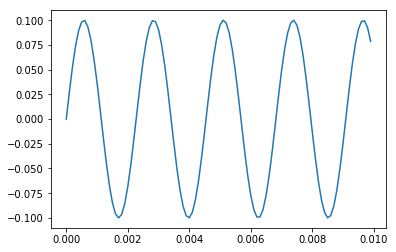

In [5]:
t = np.linspace(0, 3, 10000*3)     #times in seconds if sample for 3 seconds at 8000Hz 
u = 1/10*np.sin(2*np.pi*440*t)    #440 Hz sine wave that lasts t length seconds (here, 3 seconds) 
#w = Wave(u, samp.rate = 8000, bit=16) #make the wave variable 
plt.plot(t[0:100],u[0:100])
plt.show()
play_audio(u)

# Zad 
  - Proszę wygenerować dwa różne sygnały o takiej samej amplitudzie i okresie (częstotliwości).
  - Proszę je puścić jeden po drugim (człowiek nie słyszy przesunięcia w facie).

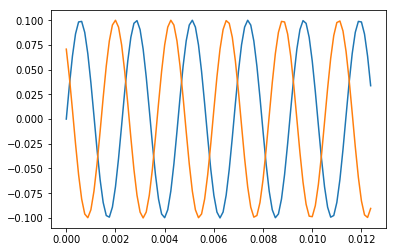

In [6]:
t = np.linspace(0, 3, 8000*3) 
s1=1/10*np.sin(2*np.pi*440*t)
s2=1/10*np.sin(2*np.pi*440*t + 3/4*np.pi)
s = np.concatenate((s1,s2))
plt.plot(t[0:100],s1[0:100])
plt.plot(t[0:100],s2[0:100])
plt.show()
play_audio(s)

# Zad 
  - Proszę wygenerować dwa różne sygnały o takiej samej fazie i okresie (częstotliwości).
  - Proszę je puścić jeden po drugim, amplituda to siła głosu (człowiek słyszy w skali logarytmicznej log(A2), decybele).

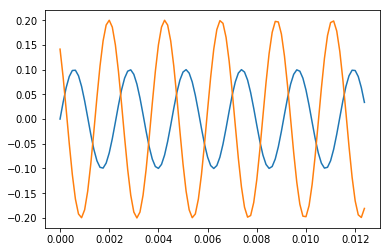

# Zad 
  - Proszę wygenerować dwa różne sygnały o takiej samej amplitudzie i fazie (tego i tak nie słyszymy).
  - Proszę je puścić jeden po drugim, okres to częstotliwości głosu (to odpowiada za różnice w dźwiękach).

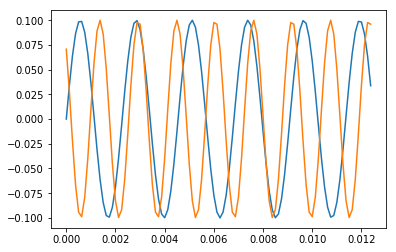